#### transactions 테이블의 중복값을 drop 하지 않고 최종 코드를 취합하기로 결로남

#### 중간 점검 발표에서 튜터님의 의견을 적극 반영하여 진행

In [1]:
import pandas as pd
#경로는 꼭 새롭게 설정 후 데이터가 가져와졌는지 확인 먼저 필요함
articles = pd.read_csv("../../data/articles_hm.csv")
customers = pd.read_csv("../../data/customer_hm.csv")
transactions = pd.read_csv("../../data/transactions_hm.csv")

In [2]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1


In [3]:
transactions.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   t_dat             1048575 non-null  str    
 1   customer_id       1048575 non-null  str    
 2   article_id        1048575 non-null  int64  
 3   price             1048575 non-null  float64
 4   sales_channel_id  1048575 non-null  int64  
dtypes: float64(1), int64(2), str(2)
memory usage: 40.0 MB


##### transactions 테이블의 t_dat은 str 이구나 날짜데이터라서 datefomat을 해야겠다.
##### customer_id는 굉장히 길이가 기네.
##### article_id는 int형으로 되어있네. 나중에 세 테이블을 연결할 때 사용할 수 있으니까 같은 타입으로 바꿔야겠다.
#####  price는 float으로 되어 있구나. 가격에 대해 보여줄 것 같으면 보기 편하게 바꾸는 편이 좋지 않을까?
##### sales_channel_id는 int로 되어 있구나. 1 = 오프라인 2 = 온라인이라고 하네. 타입도 바꾸고 보여주기 편한 글자로 바꾸면 좋겠다.

In [4]:
#customer_id 열 기준 중복된 행 확인_한 고객이 여러 번 구매한 기록이 있을 수 있으므로 중복 제거하지는 않을 것임.
transactions.duplicated('customer_id').sum()

np.int64(590340)

In [5]:
#아이디가 중복된 행은 590,340 이고, 전체 값은 1,048,575 인걸 보니 적어도 반이상은 두 번이상 구매했을 수도 있지 않을까?
transactions.shape

(1048575, 5)

In [6]:
#모든 값이 일치한 중복된 행 확인_drop 할지 말지 결정해야할듯
transactions.duplicated().sum()

np.int64(8474)

In [7]:
#price 확인
transactions["price"].describe()

count    1.048575e+06
mean     2.777915e-02
std      1.935764e-02
min      2.372880e-04
25%      1.523729e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.067797e-01
Name: price, dtype: float64

In [8]:
#null 값 확인
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [9]:
#t_dat 열의 가장 이른 날짜 확인
transactions['t_dat'].min()

'2019-01-01'

In [10]:
#t_dat 열의 가장 늦은 날짜 확인 
transactions['t_dat'].max()

'2019-12-31'

##### 이 데이터는 2019년 1월1일 ~ 2019년 12월 31일까지 1년치 데이터 라는 것을 알 수 있음.

##### 다른 테이블도 데이터 확인

In [11]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [12]:
articles.info()

<class 'pandas.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   article_id                    105542 non-null  int64
 1   product_code                  105542 non-null  int64
 2   prod_name                     105542 non-null  str  
 3   product_type_no               105542 non-null  int64
 4   product_type_name             105542 non-null  str  
 5   product_group_name            105542 non-null  str  
 6   graphical_appearance_no       105542 non-null  int64
 7   graphical_appearance_name     105542 non-null  str  
 8   colour_group_code             105542 non-null  int64
 9   colour_group_name             105542 non-null  str  
 10  perceived_colour_value_id     105542 non-null  int64
 11  perceived_colour_value_name   105542 non-null  str  
 12  perceived_colour_master_id    105542 non-null  int64
 13  perceived_colour_master_n

In [13]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

##### articles 테이블은 컬럼이 굉장히 많구나.중복값이 있는지 확인해봐야겠다.
##### join할 때 써야하는 article_id 가 int로 되어 있네. transactions 테이블에서는 str로 되어 있었는데... 값에 0이 많으니까 str으로 바꾸고 zfill을 써서 0으로 길이만큼 0으로 채워서 프로그램이 잘 돌아가도록 해야겠구나
##### null 값은 detail_desc 컬럼에만 416개가 있네. 데이터를 보고 어떻게 처리할지 결정해야겠다.

In [14]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,ACTIVE,NONE,49
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,ACTIVE,NONE,25
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,ACTIVE,NONE,24
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,ACTIVE,NONE,54
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,ACTIVE,Regularly,52


In [15]:
customers.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype
---  ------                  --------------    -----
 0   customer_id             1048575 non-null  str  
 1   FN                      1048575 non-null  int64
 2   Active                  1048575 non-null  int64
 3   club_member_status      1048575 non-null  str  
 4   fashion_news_frequency  1048574 non-null  str  
 5   age                     1048575 non-null  int64
dtypes: int64(3), str(3)
memory usage: 48.0 MB


In [16]:
customers.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    1
age                       0
dtype: int64

##### customers 테이블의 경우엔 fashion_news_frequency 컬럼에서 null이 하나 있구나.
##### 데이터를 확인하고 어떻게 처리할지 봐야겠다.

In [17]:
start_age = int(customers['age'].min())
end_age = int(customers['age'].max())
print(start_age)
print(end_age)

16
99


##### 나이는 16세가 최솟값이고, 99세가 최댓값이구나. 그러면 10대~90대로 나눠도 되겠다.

##### 원본 데이터를 지키기 위해 copy

In [18]:
#2. 원본 데이터 지키기 위해서 copy
df_cust = customers.copy()
df_tran = transactions.copy()
df_art = articles.copy()

##### 오프라인 , 온라인의 비중 확인

In [19]:
df_tran["sales_channel_id"].value_counts(dropna=False)

sales_channel_id
2    729192
1    319383
Name: count, dtype: int64

##### join을 위해서 연결할 때 쓸 id 들의 타입과 문자열의 앞부분을 지정된 길이까지 '0'으로 채워주는 메서드(zfill)을 사용하여 맞춰줌

In [20]:
#3.join을 위해 동일한 타입으로 변환
df_tran['customer_id']= df_tran['customer_id'].astype(str).str.zfill(10)
df_cust['customer_id']= df_cust['customer_id'].astype(str).str.zfill(10)

df_tran['article_id']= df_tran['article_id'].astype(str).str.zfill(10)
df_art['article_id'] = df_art['article_id'].astype(str).str.zfill(10)

##### df_tran에서 전체 값이 중복인 데이터 수 확인
##### drop 안하고 가기로 했으니 drop NO!

In [21]:
#4. 데이터 크기 및 중복 확인

print("df_tran (복사본) 크기:", df_tran.shape)
print("중복 데이터 수:", df_tran.duplicated().sum())

df_tran (복사본) 크기: (1048575, 5)
중복 데이터 수: 8474


##### 날짜 데이터를 분석할 때 쓰기 편하게 datetime함수를 사용하여 변환

In [22]:
#6. 날짜 타입 변환
df_tran['t_dat'] = pd.to_datetime(df_tran['t_dat'], format='%Y-%m-%d')
# 타입 변환 확인
df_tran.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   t_dat             1048575 non-null  datetime64[us]
 1   customer_id       1048575 non-null  str           
 2   article_id        1048575 non-null  str           
 3   price             1048575 non-null  float64       
 4   sales_channel_id  1048575 non-null  int64         
dtypes: datetime64[us](1), float64(1), int64(1), str(2)
memory usage: 40.0 MB


##### sales_channel_id 컬럼을 이용하여 파생 컬럼을 만들고, 값들을 보기 편하게 변환
##### 튜터님 피드백 내용에서 세계 공통 언어(영어)로 쓰는 편이 좋다고 하셔서 바꿈

In [23]:
#7. 판매 채널 컬럼 생성 및 값 변환
df_tran["channel"] = df_tran["sales_channel_id"].map({1: "Offline", 2: "Online"})
df_tran["channel"].value_counts() 
numbs = df_tran["channel"].value_counts()
print("온라인:", f"{numbs['Online']:,}")
print("오프라인:", f"{numbs['Offline']:,}")
print("전체 거래 건수:", f"{df_tran.shape[0]:,}")

온라인: 729,192
오프라인: 319,383
전체 거래 건수: 1,048,575


In [34]:
df_tran['sales_channel_id'].value_counts(normalize=True) * 100

sales_channel_id
2    69.541235
1    30.458765
Name: proportion, dtype: float64

##### 전체 거래 건수의 온오프라인 비중을 시각화 자료로 뽑기

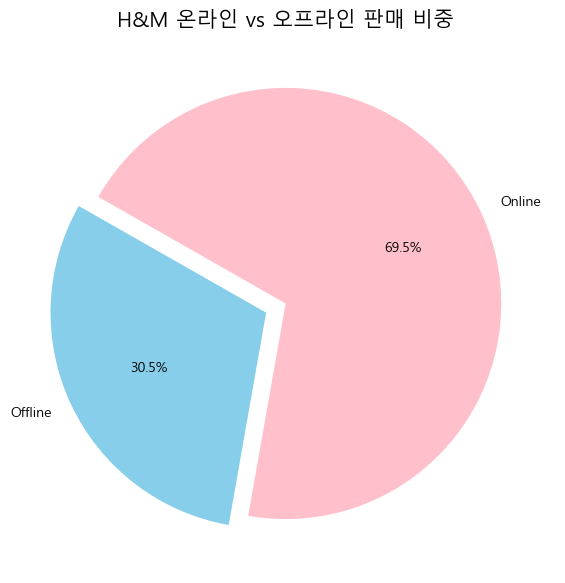

In [35]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

# 2. 그래프 크기 정하기 (정사각형으로 해야 원이 예뻐요)
plt.figure(figsize=(7, 7))
explode = [0, 0.10]
# 3. 원형 그래프 그리기
# numbs를 넣고, 파이 조각에 이름(labels)이랑 퍼센트(autopct)를 표시해줘!
numbs.plot.pie(
    autopct='%.1f%%',      # 소수점 첫째자리까지 퍼센트 표시
    startangle=260,         # 12시 방향부터 시작하기
    colors=['pink', 'skyblue'], # 예쁜 분홍색과 하늘색
    ylabel='',                # 왼쪽의 지저분한 글자 지우기
    explode=explode                          
)


# 4. 제목 달기
plt.title("H&M 온라인 vs 오프라인 판매 비중", fontsize=15)
plt.savefig('channel.pi.png', dpi=300)
# 5. 화면에 보여줘!
plt.show()

In [26]:
df_tran.shape

(1048575, 6)

In [27]:
df_art.shape

(105542, 25)

In [28]:
df_cust.shape

(1048575, 6)

In [29]:
df_tran['month'] = df_tran['t_dat'].dt.month

In [30]:
df_tran.head()

,t_dat,customer_id,article_id,price,sales_channel_id,channel,month
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,0698328010,0.016932,2,Online,11
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,0760597002,0.033881,2,Online,5
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,0488561032,0.016932,2,Online,5
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,0682771001,0.033881,2,Online,8
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,0742400033,0.003220,1,Offline,8


In [31]:
#11.월별 거래 건수 & 매출액 계산
monthly_sales = df_tran.groupby('month').size()
monthly_price = df_tran.groupby('month')['price'].sum()
print(monthly_price)

month
1     2148.279639
2     2006.034201
3     2395.173487
4     2725.229843
5     2768.568961
6     3113.444654
7     2571.945537
8     1960.310828
9     2581.655388
10    2376.303726
11    2482.021880
12    1999.556979
Name: price, dtype: float64


In [32]:
#12. 최고 매출 월 
best_month = monthly_price.idxmax()
best_value = monthly_price.max()
print("가장 매출이 높은 달:", best_month)
print("그 달의 매출:", best_value) 

가장 매출이 높은 달: 6
그 달의 매출: 3113.444654044


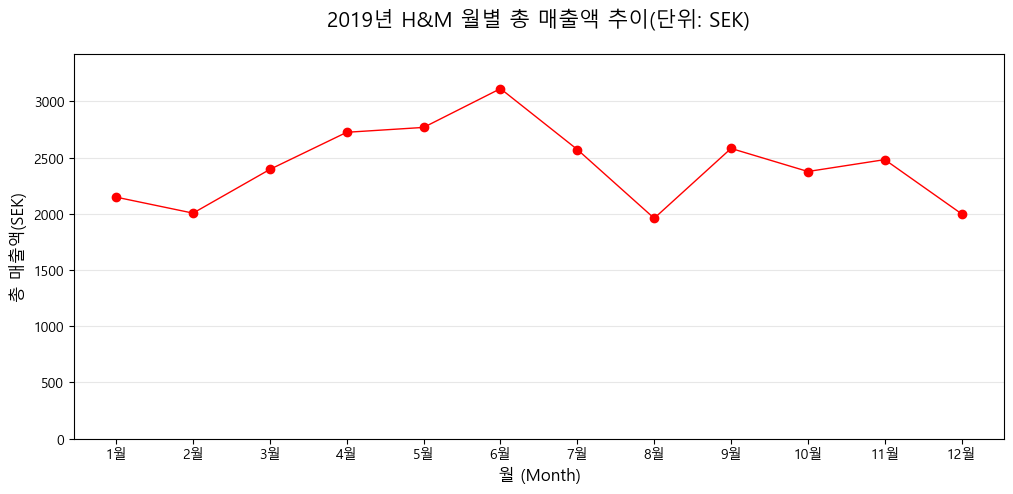

In [33]:
import matplotlib.pyplot as plt

monthly_price_num = df_tran.groupby('month')['price'].sum()

plt.figure(figsize=(12, 5))

monthly_price_num.plot(kind='line', marker='o', color='red', linewidth=1)

plt.ylim(0, monthly_price_num.max() * 1.1) 

plt.xticks(range(1, 13), [f'{i}월' for i in range(1, 13)]) 

plt.title('2019년 H&M 월별 총 매출액 추이(단위: SEK)', fontsize=15, pad=20)
plt.ylabel('총 매출액(SEK)', fontsize=12)
plt.xlabel('월 (Month)', fontsize=12) # '년-월'에서 '월'로 이름도 바꿔주면 더 좋겠죠?
plt.grid(True, axis='y', alpha=0.3)
plt.savefig('price_month.png', dpi=300)
plt.show()

In [36]:
df_art['detail_desc'] = df_art['detail_desc'].fillna('No Description')

In [37]:
cols_to_drop = [
    'product_type_no', 
    'graphical_appearance_no', 
    'colour_group_code', 
    'perceived_colour_value_id',
    'perceived_colour_master_id',
    'department_no',
    'index_code',
    'index_group_no',
    'section_no',
    'garment_group_no'
]
articles_cleaned = df_art.drop(columns=cols_to_drop)

In [39]:
#4-1. 시즌 별 매핑 (product_season) / 시즌성 구분을 위한 키워드 정의
def get_season(row):
    # section_name과 prod_name을 합쳐서 판단
    text = (str(row['section_name']) + " " + str(row['prod_name'])).lower()
    group = str(row['product_group_name']).lower()
    
    # 1. SS
    ss_keywords = [
        'swimwear', 'sport', 'shorts', 'sandals', 'sleeveless', 
        'tank', 'mini', 'beach', 'summer', 'sun', 'flip flop', 
        'skirt', 'dress'
    ]

    # 2. FW 
    fw_keywords = [
        'outerwear', 'knitted', 
        'jacket', 'coat', 'hoodie', 'sweatshirt', 'scarf', 'gloves', 
        'boots', 'heavy', 'fur', 'wool', 'cardigan', 'winter'
    ]
    
    if any(kw in text for kw in ss_keywords) or group in ['swimwear']:
        return 'SS'
    # FW는 오직 두꺼운 옷 키워드가 있을 때만! (items of clothing 조건 제거)
    elif any(kw in text for kw in fw_keywords):
        return 'FW'
    else:
        return 'All-Season'

#4-2. 파생변수 생성 및 axis=1로 왼쪽에서 오른쪽으로(행 방향) 읽도록 조정
df_art['product_season'] = df_art.apply(get_season, axis=1)
#4-3. 메인 카테고리 정의 (원본 보존)
df_art['category_main'] = df_art['index_group_name']